# 15.077: Problem Set 7
Alex Berke (aberke)

##  Reading
[H] Hastie, T., Tibshirani, R., and Friedman, J., The Elements of Statistical Learning: Data Mining, Inference and Prediction, Springer, 2nd ed., 2009 (ISBN 978-0-387-84857-0). https://web.stanford.edu/~hastie/ElemStatLearn/

12.1-12.2, 12.3.1-12.3.2, 12.3.6, 11.1, 11.3-11.8, 11.10, 13.1-13.2 (omit 13.2.2-13.2.3), 13.3 (omit 13.3.3), 14.3 (omit 14.3.9)

In [23]:
%config Completer.use_jedi = False # autocomplete

import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn import tree


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Problems

## 1. SPAM.
(Moved from HW#6 and Neural Net added.)
#### Fit a SVM and Neural Net model to the spam data and compare the classification results to the tree model given in Section 9.2.5 for the spam data. For example, you might look at measures like sensitivity and specificity. You might also compare the interpretability of the three models.


To do this I first scale the input data so that the distances for features are comparable. I then partition the data into 80/20 training/test  sets.  The models are trained on the (80%) training data and then tested on the remaining (20%) test data. The test results are used to produce a confusion matrix, shown below, and compute the sensitivity and  specificity of the model. These results are compared  to the classification results from the tree model   in section 9.2.5 (see table 9.3).

In [20]:
spam = pd.read_csv('spam.txt', header=None, delimiter=" ")
X, y = spam[list(range(57))], spam[57]

# scale the input data
scaler = StandardScaler() 
scaler.fit(X)
X = scaler.transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('data partitioned into  80-20 train-test split')
print('train size = %s; test size = %s' % (len(X_train), len(X_test)))
# spam

data partitioned into  80-20 train-test split
train size = 3680; test size = 921


#### SVM

sensitivity = 0.8923
specificity = 0.9661


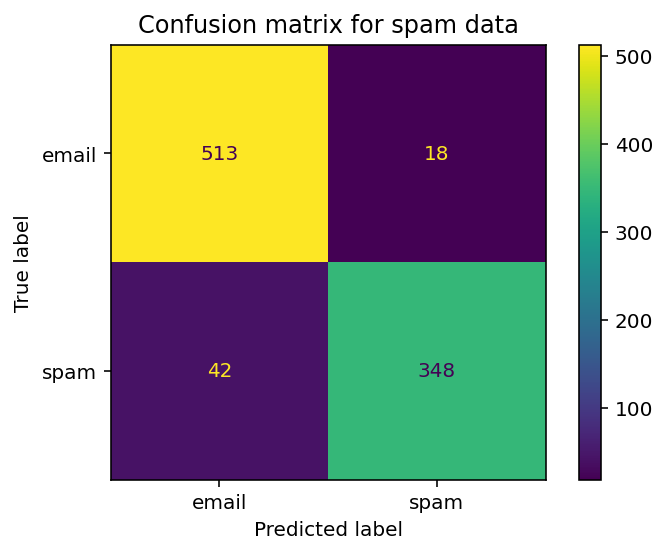

In [21]:
clf = svm.SVC(kernel='rbf') # using radial-like kernal
# train
clf.fit(X_train, y_train) 
# test
predictions = clf.predict(X_test)
# make the confusion matrix
cm = confusion_matrix(y_test,  predictions, labels=clf.classes_)
# print('clf.classes_:', clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['email','spam'])
disp.plot()
_ = plt.title('Confusion matrix for spam data')

tn, fp = cm[0]
fn, tp = cm[1]
sensitivity = tp / (tp + fn)
print('sensitivity = %0.4f' % sensitivity)
specificity = tn / (tn + fp)
print('specificity = %0.4f' % specificity)

For the SVM model, sensitivity is 89.2% and specificity is 96.6%.
The tree model in section 9.2.5 had sensitivity 86.3 % and specificity is 93.4%.

The SVM model outperformed the tree model, however, the tree model may be more interpretable. The SVM has decision boundaries in a space with 57 dimensions. Properly viewing and understanding these boundaries may be infeasible while the tree model can be interpreted as  a set of rules (such as in Figure 9.5),  to help us understand which email characteristics are  more likely to contribute to the classification of spam.

However, further work could use clustering or other feature selection tools to reduce the 57 dimensions to a lower dimensional space, and plot the decision boundaries of the SVM model with 2 features at a time. This would help with SVM model interpretability.


#### Neural Net

There are a variety of neural network architecture that could be fit for this problem.

For a better neural network model, I would re-partition the data into train, validation, and test sets, and then use cross-validation to find the best model architecture.

But the problem did not ask for that. 
So instead, I will model this neural network off of the example in the book [H], section 11.5 (see figure 11.4) and use a neural network with:
- 1 hidden layer
- 10 units in the hidden layer
- L2 regularization for weights, with weight decay parameter of 0.02.

/Users/aberke/MIT-classes/mit-stats-15.077/env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


sensitivity = 0.9103
specificity = 0.9699


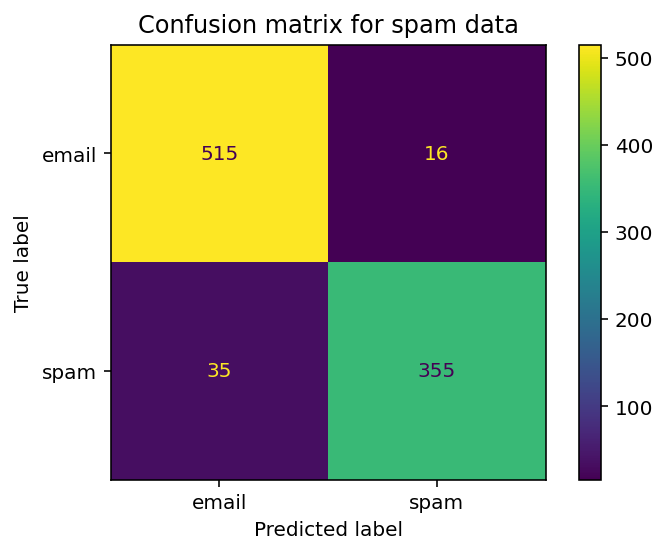

In [30]:
# According to documentation, for small datasets ‘lbfgs’ can converge faster
# and perform better. However, it was failing to allow the network to converge.
# Using default 'adam' solver instead. (Still get convergence warning, but better results).
clf = neural_network.MLPClassifier(solver='adam', # solver='lbfgs', 
                                   alpha=0.02,
                                   hidden_layer_sizes=(10),
                                   random_state=1)
# train
clf.fit(X_train, y_train) 
# test
predictions = clf.predict(X_test)
# make the confusion matrix
cm = confusion_matrix(y_test,  predictions, labels=clf.classes_)
# print('clf.classes_:', clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['email','spam'])
disp.plot()
_ = plt.title('Confusion matrix for spam data')

tn, fp = cm[0]
fn, tp = cm[1]
sensitivity = tp / (tp + fn)
print('sensitivity = %0.4f' % sensitivity)
specificity = tn / (tn + fp)
print('specificity = %0.4f' % specificity)

The neural network performs the best in terms of sensitivity and specificity. However, it is the least interpretable of the models given that it learns nonlinear functions in order to make the predictions.

Of all the models, the sensitivity and specificy scores were similar. However, for this particular problem of detecting spam, specificty seems very important, as it is problematic when good emails go to the spam folder.

For this reason, we might use the SVM classifier and do more work to make it more interpretable.

### 2. An equities analyst is studying the pharmaceutical industry and would like your help in exploring and understanding the financial data collected by her firm.  
Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures.
Financial data gathered on 21 firms in the pharmaceutical industry are available in the file
posted.  

1.
Market capitalization (in billions of dollars)

2.
Beta

3.
Price/earnings ratio

4.
Return on equity

5.
Return on assets

6.
Asset turnover

7.
Leverage

8.
Estimated revenue growth

9.
Net profit margin

10.
Median recommendation (across major brokerages)

11.
Location of firm’s headquarters

12.
Stock exchange on which the firm is listed


In [3]:
firms = pd.read_excel('pharmaceuticals.xls')
firms

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE


Use cluster analysis to explore and analyze the given dataset as follows:

#### (a) Use only the quantitative variables (1 to 9) to cluster the 21 firms.  Justify the various choices made in conducting the cluster analysis, such as weights accorded different variables, the specific clustering algorithm/s used, the number of clusters formed, and so on.


#### (b) Interpret the clusters with respect to the quantitative variables that were used in forming the clusters.


#### (c) Is there a pattern in the clusters with respect to the qualitative variables (10 to 12) (those not used in forming the clusters)?

#### (d) Provide an appropriate name for each cluster using any or all of the variables in the dataset.